In [1]:
!pip install pandas

In [2]:
!pip install nltk
#Standard Libraries #
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
     ------------------------------------ 262.1/262.1 kB 196.6 kB/s eta 0:00:00
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
     -------------------------------------- 96.6/96.6 kB 502.0 kB/s eta 0:00:00


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

## For building models ##
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

## For measuring performance ##
from sklearn import metrics
from sklearn.model_selection import cross_val_score

## To visualize decision tree ##
# from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
# import pydotplus

## Ignore warnings ##
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
messages = pd.read_csv('F:\\data science\\Sntimental anlysis on financial dataset-NLP\\data\\FinancialData.csv',names=["label", "message"], encoding='latin-1')
messages.head()

,label,message
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [5]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    4846 non-null   object
 1   message  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [6]:
messages.isnull().sum()

label      0
message    0
dtype: int64

introducing new coloumn Target

In [7]:
News_copy=messages.copy()
News_copy.shape

(4846, 2)

In [8]:
def func(df_new):
    if df_new == 'neutral':
        return 0
    elif df_new == 'negative':
        return 1
    else:
        return 2

In [10]:
News_copy['target'] = News_copy.label.apply(func)
News_copy.head()

,label,message,target
0,neutral,"According to Gran , the company has no plans t...",0
1,neutral,Technopolis plans to develop in stages an area...,0
2,negative,The international electronic industry company ...,1
3,positive,With the new production plant the company woul...,2
4,positive,According to the company 's updated strategy f...,2


In [14]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,neutral,"According to Gran , the company has no plans t...",127
1,neutral,Technopolis plans to develop in stages an area...,190
2,negative,The international electronic industry company ...,228
3,positive,With the new production plant the company woul...,206
4,positive,According to the company 's updated strategy f...,203


<AxesSubplot:ylabel='Frequency'>

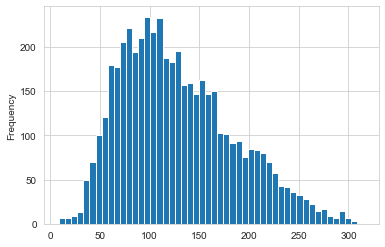

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
messages['length'].plot(bins=50, kind='hist') 

In [17]:
messages.label.value_counts()

neutral     2879
positive    1363
negative     604
Name: label, dtype: int64

Text(0.5, 1.0, 'Percentages of different lables to the messahes')

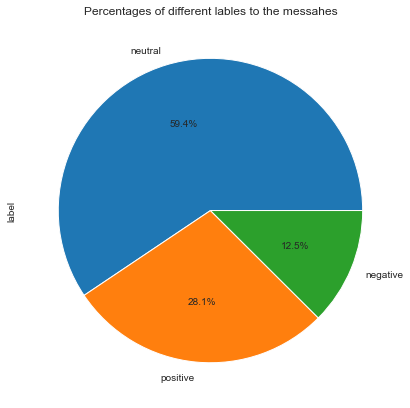

In [21]:
plt.figure(figsize=(7,7))

messages.label.value_counts().plot(kind='pie', autopct='%4.1f%%')
plt.title("Percentages of different lables to the messahes")

data pre-processing

In [24]:
import nltk #NLP library
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords #removes unnecessary(repetitive) words
import re #regex
import string
# nltk.download_shell()

In [25]:
import string
from nltk.corpus import stopwords
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
messages['message'].head(5).apply(text_process)

0    [According, Gran, company, plans, move, produc...
1    [Technopolis, plans, develop, stages, area, le...
2    [international, electronic, industry, company,...
3    [new, production, plant, company, would, incre...
4    [According, company, updated, strategy, years,...
Name: message, dtype: object

Vectorization

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

12278


In [28]:
message4 = messages['message'][3]
print(message4)

With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .


In [29]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 6987)	1
  (0, 7255)	1
  (0, 7639)	1
  (0, 8154)	1
  (0, 8848)	1
  (0, 8877)	3
  (0, 9446)	1
  (0, 9485)	1
  (0, 9721)	1
  (0, 10143)	1
  (0, 10340)	2
  (0, 10352)	1
  (0, 10503)	1
  (0, 11660)	1
  (0, 11952)	1
  (0, 12206)	2
(1, 12278)


In [30]:
print(bow_transformer.get_feature_names()[6987])
print(bow_transformer.get_feature_names()[12206])

capacity
would


In [31]:
messages_bow = bow_transformer.transform(messages['message'])

In [32]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (4846, 12278)
Amount of Non-Zero occurences:  60652


In [33]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [34]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 12206)	0.34006531984231525
  (0, 11952)	0.18401976136204104
  (0, 11660)	0.261790357183673
  (0, 10503)	0.21916674125837723
  (0, 10352)	0.24441018572286424
  (0, 10340)	0.3226250661727878
  (0, 10143)	0.16221188996815172
  (0, 9721)	0.13728819203806375
  (0, 9485)	0.2479949389970483
  (0, 9446)	0.21061609765147357
  (0, 8877)	0.5002653610822685
  (0, 8848)	0.21607154589277733
  (0, 8154)	0.17452132143656565
  (0, 7639)	0.21323459607543088
  (0, 7255)	0.09710746479542764
  (0, 6987)	0.1917564023250975


In [35]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(4846, 12278)


Training the model

In [36]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [37]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[1])

predicted: neutral
expected: neutral


Test the Model

In [38]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['neutral' 'neutral' 'neutral' ... 'positive' 'positive' 'neutral']


In [39]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

    negative       1.00      0.10      0.18       604
     neutral       0.74      0.99      0.85      2879
    positive       0.76      0.52      0.62      1363

    accuracy                           0.75      4846
   macro avg       0.83      0.54      0.55      4846
weighted avg       0.78      0.75      0.70      4846



In [40]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

3876 970 4846


In [41]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [42]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000000732C029750>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [43]:
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

    negative       0.03      1.00      0.06         4
     neutral       0.98      0.69      0.81       809
    positive       0.35      0.59      0.44       157

    accuracy                           0.68       970
   macro avg       0.45      0.76      0.44       970
weighted avg       0.87      0.68      0.75       970



saing the model to pickel file

In [45]:
import pickle
pickle.dump(messages,open('Sentiment_model.pkl','wb'))